# Image classification using Convolutional Neural Networks


## Importing packages

If you have installed all packages specified in `requirements.txt` this should work.

Ignore tensorflow warnings. (Run again to remove red warnings)

In [2]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# Data - Fashion-MNIST 

It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more. The mapping of all 0-9 integers to class labels is listed below. 

In the following example we will import the dataset and print some examples.

Label ID | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
:--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
**Category** | T-shirt/top | Trouser | Pullover | Dress | Coat | Sandal | Shirt | Sneaker | Bag | Ankle boot |

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


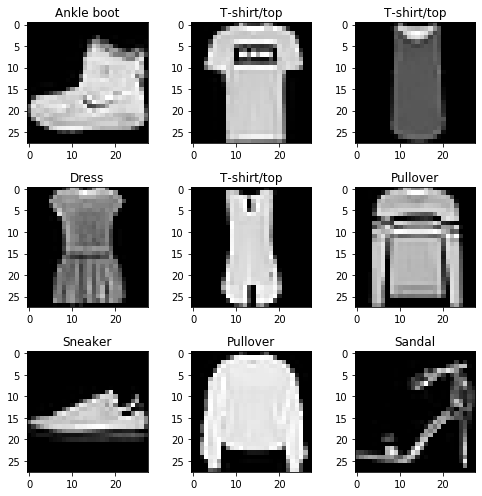

In [3]:
pyplot.rcParams['figure.figsize'] = [7, 7]

# load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

# Plot first 9 examples
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.title(labels[trainY[i]])
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

pyplot.tight_layout()
pyplot.show()

# Load and preprocess the dataset

1. Reshape data
2. One hot encode categorical data
    

In [4]:
# reshape dataset to have a single channel

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# Normalize dataset

In [5]:
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

# Define CNN model

In [6]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Model evaulation

In [7]:
# Containers for results
scores, histories = list(), list()

# K-fold cross-validation
n_folds = 5
kfold = KFold(n_folds, shuffle=True, random_state=1)

for train_ix, test_ix in kfold.split(trainX):
    
    # define model
    model = define_model()
    
    # select rows for train and test
    fold_trainX, fold_trainY, fold_testX, fold_testY = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]
    
    # fit model
    history = model.fit(fold_trainX, fold_trainY, epochs=10, batch_size=32, validation_data=(fold_testX, fold_testY), verbose=1)
    
    # evaluate model
    _, acc = model.evaluate(fold_testX, fold_testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    
    # append scores
    scores.append(acc)
    histories.append(history)



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 274us/step - loss: 0.4437 - accuracy: 0.8426 - val_loss: 0.3412 - val_accuracy: 0.8777
Epoch 2/10
48000/48000 [==============================] - 11s 225us/step - loss: 0.2956 - accuracy: 0.8934 - val_loss: 0.2957 - val_accuracy: 0.8941
Epoch 3/10
48000/48000 [==============================] - 11s 231us/step - loss: 0.2543 - accuracy: 0.9062 - val_loss: 0.2705 - val_accuracy: 0.9022
Epoch 4/10
48000/48000 [==============================] - 11s 226us/step - loss: 0.2208 - accuracy: 0.9192 - val_loss: 0.2626 - val_accuracy: 0.9027
Epoch 5/10
48000/48000 [==============================] - 11s 229us/step - loss: 0.1980 - accuracy: 0.9272 - val_loss: 0.2603 - val_accuracy: 0.9072
Epoch 6/10
48000/48000 [==============================] - 11s 222us/step - loss: 0.1779 - accuracy: 0.9336 - val_loss: 0.2509 - val_accuracy: 0.9100
Epoch 7/10
48000/48000 [==============================

# Visualization of performance

c:\users\krille\git\cnn_bowly\venv\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
c:\users\krille\git\cnn_bowly\venv\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


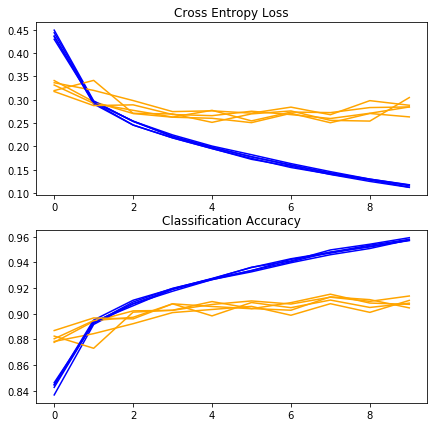

In [8]:
for i in range(len(histories)):
    
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
    
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    
pyplot.show()

# Performance summary

Accuracy: mean=90.888 std=0.310, n=5


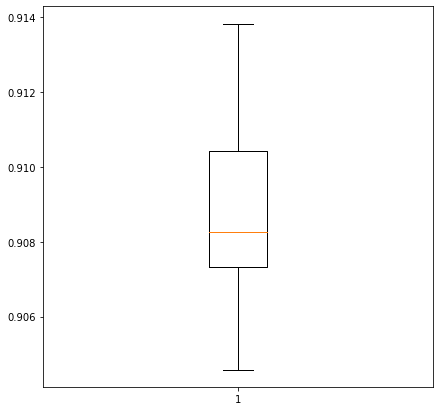

In [9]:
# print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))

# box and whisker plots of results
pyplot.boxplot(scores)
pyplot.show()